In [1]:
import numpy as np
import pandas as pd
import pickle
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Flatten
from keras.layers import Embedding
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, model_from_json
from keras.layers import Dense, LSTM, Dropout, Bidirectional, merge
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot
from nltk.corpus import stopwords
import wikipedia
from sklearn.preprocessing import StandardScaler
from multiprocessing import Pool

#from mlutils import dataset
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
import sklearn.datasets
import sklearn.cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

import os, sys, re, csv
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
from difflib import SequenceMatcher
import math
import nltk
from datetime import datetime
from nltk.tokenize import word_tokenize
from itertools import product

import time 
from sklearn.preprocessing import StandardScaler
from multiprocessing import Pool

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Train Data
df_train = pd.read_csv('/Users/s0c02nj/Desktop/Personal Edu doc/Competitions /Microsoft/data/data.tsv', 
                       delimiter="\t",header=None)

In [3]:
#Test Data
df_test = pd.read_csv('/Users/s0c02nj/Desktop/Personal Edu doc/Competitions /Microsoft/data/eval1_unlabelled.tsv', 
                      delimiter="\t",header=None)

In [4]:
df_train.columns = ["id", "question", "answer", "is_ans", "seq_no"]

In [5]:
df_test.columns = ["id", "question", "answer", "seq_no"]

In [47]:
# df_zero = df_train[df_train['is_ans'] == 0]
# df_zero = df_zero.drop_duplicates(subset='id', keep="last")
# df_one  = df_train[df_train['is_ans'] == 1]
# df_train= pd.concat([df_zero,df_one], axis=0)
# df_train= df_train.sample(frac=1)

In [8]:
#df_one.head(10)

In [7]:
# folder_path= '/Users/s0c02nj/Downloads/glove.6B/glove.6B.300d.txt'
# f=open(folder_path)
# doc=f.readlines()
# #****VIP
# #**WORD TO VEC DICTIONARY
# #Forming a dictionary-word2vec
# word2vec={}
# key=[]
# #looping though the doc.in the doc the entire thing is saved and is separated by a space bar.
# for line in doc:
#     #parts contains every word separately for doc1
#     parts=line.split(' ')
#     #part[0] contains the word
#     word=parts[0]
#     key.append(word)
#     #embed contains the vector
#     embed=np.array(parts[1:],dtype='float32')
#     #filling up the dictionary
#     word2vec[word]=embed

#NOW IF i give word as the key, the corre

In [8]:
# #Creating a Dictionary for Item Desc
# def get_item_vec(str1):
#     w2v=np.zeros((1,300))
#     str1 = str1.split()
#     for token1 in str1:
#         if token1 in word2vec.keys():
#             w2v=w2v+word2vec[token1]
#     return w2v

In [33]:
# #Creating the dict for the question
# q2vec={}
# a2vec={}
# for i in range(0,len(df_train)):
#     print i
#     d=df_train.iloc[i]
#     q=df_train['question'].iloc[i]
#     a=df_train['answer'].iloc[i]
#     if q not in q2vec:
#         q2vec[q] = get_item_vec(q)
#     if a not in a2vec:
#         a2vec[a]= get_item_vec(a)

In [31]:
# import time
# t1=time.time()
# num_partitions = 16
# n_cores=8
# dist_df = parallelize_dataframe(df_train, get_glove_embed)
# t2=time.time()

# print t2-t1

In [6]:
df_one  = df_train[df_train['is_ans'] == 1]

In [7]:
#Left Join
join_df=pd.merge(left=df_train, right=df_one, how='inner', left_on=['question'], right_on=['question'])


In [8]:
join_df.head(2)

,id_x,question,answer_x,is_ans_x,seq_no_x,id_y,answer_y,is_ans_y,seq_no_y
0,131,. what is a corporation?,A company is incorporated in a specific nation...,0,0,131,McDonald's Corporation is one of the most reco...,1,5
1,131,. what is a corporation?,"Today, there is a growing community of more th...",0,1,131,McDonald's Corporation is one of the most reco...,1,5


In [9]:
join_df.iloc[0]['answer_y']

"McDonald's Corporation is one of the most recognizable corporations in the world. A corporation is a company or group of people authorized to act as a single entity (legally a person) and recognized as such in law. Early incorporated entities were established by charter (i.e. by an ad hoc act granted by a monarch or passed by a parliament or legislature)."

In [10]:
def get_cosine(str1, str2):
    
    #Counter forms a dictionary----> Frequency of words as values and key is the word
    vec1 = Counter(str1.split())
    vec2 = Counter(str2.split())
    
    #Intersection contains the set of common words
    intersection = set(vec1.keys()) & set(vec2.keys())
    
    #W1W2W2=[1,2,3] and W1W2W3=[2,4,6] ,it finds the a.b value
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    #|a| and |b| are computed through the process
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    #cosine value is computed
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [11]:
# def DistJaccard(str1, str2):
#     str1 = set(str1.split())
#     str2 = set(str2.split())
#     #a_intersection_b ---unique
#     numerator = len(str1 & str2)
#     #a_union_b---unique
#     denominator = len(str1 | str2)
#     if not denominator:
#         return 0.0
#     else:
#         return float(numerator) / denominator


In [12]:
# def shared_2gram(q1, q2):
#     #zip will combine the first doc with the second doc element by element
#     q1_2gram = set([i for i in zip(q1.split(), q1.split()[1:])])
#     q2_2gram = set([i for i in zip(q2.split(), q2.split()[1:])])
#     shared_2gram = q1_2gram.intersection(q2_2gram)
#     if len(q1_2gram)==0 or len(q2_2gram) == 0:
#         return 0
#     return len(shared_2gram)*2.0/(len(q1_2gram) + len(q2_2gram))

In [13]:
# def shared_3gram(q1, q2):
#     q1_3gram = set([i for i in zip(q1.split(), q1.split()[1:], q1.split()[2:])])
#     q2_3gram = set([i for i in zip(q2.split(), q2.split()[1:], q2.split()[2:])])
#     shared_3gram = q1_3gram.intersection(q2_3gram)
#     if len(q1_3gram)==0 or len(q2_3gram) == 0:
#         return 0
#     return len(shared_3gram)*1.0/(len(q1_3gram) + len(q2_3gram))


In [14]:
def worker(data):
    cosine_sim, jaccard_sim, shared_2gram_sim, shared_3gram_sim,len_sim = np.zeros((len(data), )), np.zeros((len(data), )), np.zeros((len(data), )), np.zeros((len(data), )),np.zeros((len(data), ))       
    #print '*'*50
    for i in range(0,len(data)):
        act_ans=data.iloc[i]['answer_x']
        cor_ans=data.iloc[i]['answer_y']
        cosine_sim[i] = get_cosine(act_ans,cor_ans)
        #abb_desc_sim[i] = get_desc_sim(str(d[1]), str(d[2]))
        #jaccard_sim[i] =  DistJaccard(str(d[1]), str(d[2]))
        #shared_2gram_sim[i] = shared_2gram(str(d[1]), str(d[2]))
        #shared_3gram_sim[i] = shared_3gram(str(d[1]), str(d[2]))
        #len_sim[i] =len(d[2])
    result = pd.DataFrame()
    result['cosine'] = pd.Series(list(cosine_sim))
    #result['jaccard'] = pd.Series(list(jaccard_sim))
    #result['shared_2gram'] = pd.Series(list(shared_2gram_sim))
    #result['shared_3gram'] = pd.Series(list(shared_3gram_sim))
    #result['len_ans']=pd.Series(list(len_sim))
    return result

In [15]:
def parallelize_dataframe(df, func):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [16]:
import time
t1=time.time()
num_partitions = 16
n_cores=8
dist_df = parallelize_dataframe(join_df, worker)
t2=time.time()

print t2-t1

644.873388052


In [27]:
#dist_df

In [17]:
df_train['cosine']=np.ravel(dist_df)

In [35]:
#df_train.values

In [22]:
df_train.head(10)

,id,question,answer,is_ans,seq_no,cosine
0,131,. what is a corporation?,A company is incorporated in a specific nation...,0,0,0.593617
1,131,. what is a corporation?,"Today, there is a growing community of more th...",0,1,0.244169
2,131,. what is a corporation?,"Corporation definition, an association of indi...",0,2,0.340276
3,131,. what is a corporation?,Examples of corporation in a Sentence. 1 He w...,0,3,0.383598
4,131,. what is a corporation?,1: a government-owned corporation (as a utilit...,0,4,0.373812
5,131,. what is a corporation?,McDonald's Corporation is one of the most reco...,1,5,1.000000
6,131,. what is a corporation?,Corporations are owned by their stockholders (...,0,6,0.354654
7,131,. what is a corporation?,An Association is an organized group of people...,0,7,0.318195
8,131,. what is a corporation?,B Corp certification shines a light on the com...,0,8,0.220564
9,131,. what is a corporation?,LLCs offer greater flexibility when it comes t...,0,9,0.273998


In [19]:
df_train.to_csv(path_or_buf="/Users/s0c02nj/Desktop/cosine", encoding='utf-8')

In [ ]:
unique_qs=df_train['question'].unique()

In [ ]:
qs_ans=np.zeros((len(unique_qs),10))
for i,j in enumerate(unique_qs):
    print i
    qs_ans[i]=df_train[df_train['question']==j]['cosine']

In [20]:
#np.array(df_train[df_train['question']=='. what is a corporation?']['cosine'])

In [21]:
#np.array(df_train[df_train['question']==0]['cosine'])

In [118]:
df_train.iloc[0]['question']

'. what is a corporation?'

In [ ]:
a=data[data['question']==data.iloc[i]['question']]
b=a[a['is_ans']==1]['answer']

In [128]:
a=df_train[df_train['question']==df_train.iloc[0]['question']]
b=a[a['is_ans']==1]['answer']

In [131]:
df_train.iloc[0][2]

'A company is incorporated in a specific nation, often within the bounds of a smaller subset of that nation, such as a state or province. The corporation is then governed by the laws of incorporation in that state. A corporation may issue stock, either private or public, or may be classified as a non-stock corporation. If stock is issued, the corporation will usually be governed by its shareholders, either directly or indirectly.'

In [67]:
x_feat=dist_df

In [68]:
y=df_train['is_ans']

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([1.66700e+05, 1.43430e+05, 1.09484e+05, 6.38190e+04, 2.93050e+04,
        1.04310e+04, 2.97300e+03, 6.43000e+02, 1.11000e+02, 1.60000e+01]),
 array([0.        , 0.09807692, 0.19615385, 0.29423077, 0.39230769,
        0.49038462, 0.58846154, 0.68653846, 0.78461538, 0.88269231,
        0.98076923]),
 <a list of 10 Patch objects>)

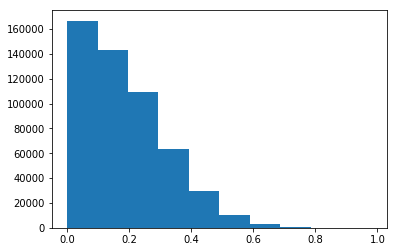

In [69]:
plt.hist(x_feat[y==0]['cosine'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([1.61171e+05, 1.42265e+05, 1.09487e+05, 6.47190e+04, 2.95260e+04,
        1.05580e+04, 2.96200e+03, 6.45000e+02, 1.12000e+02, 1.90000e+01]),
 array([0.        , 0.09807692, 0.19615385, 0.29423077, 0.39230769,
        0.49038462, 0.58846154, 0.68653846, 0.78461538, 0.88269231,
        0.98076923]),
 <a list of 10 Patch objects>)

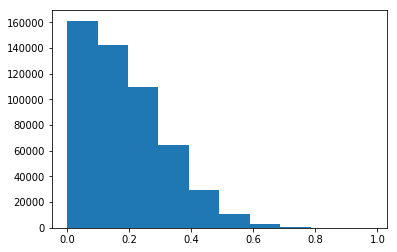

In [70]:
plt.hist(x_feat[y==1]['cosine'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([4.51158e+05, 7.06240e+04, 4.21500e+03, 5.64000e+02, 2.02000e+02,
        8.20000e+01, 3.30000e+01, 1.90000e+01, 1.10000e+01, 4.00000e+00]),
 array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ]),
 <a list of 10 Patch objects>)

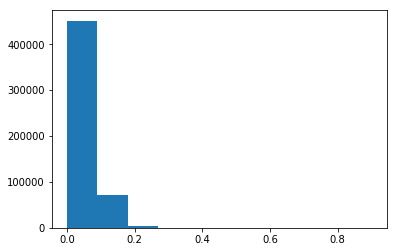

In [71]:
plt.hist(x_feat[y==0]['jaccard'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([4.41969e+05, 7.38260e+04, 4.61200e+03, 6.96000e+02, 1.99000e+02,
        9.90000e+01, 4.00000e+01, 1.30000e+01, 5.00000e+00, 5.00000e+00]),
 array([0.        , 0.08888889, 0.17777778, 0.26666667, 0.35555556,
        0.44444444, 0.53333333, 0.62222222, 0.71111111, 0.8       ,
        0.88888889]),
 <a list of 10 Patch objects>)

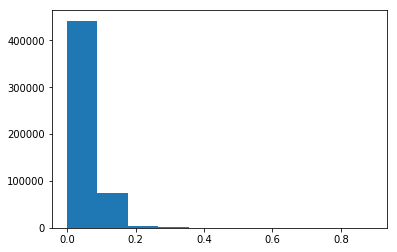

In [72]:
plt.hist(x_feat[y==1]['jaccard'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([5.10517e+05, 1.39550e+04, 1.58800e+03, 4.56000e+02, 1.88000e+02,
        9.70000e+01, 5.20000e+01, 3.60000e+01, 1.60000e+01, 7.00000e+00]),
 array([0.        , 0.09473684, 0.18947368, 0.28421053, 0.37894737,
        0.47368421, 0.56842105, 0.66315789, 0.75789474, 0.85263158,
        0.94736842]),
 <a list of 10 Patch objects>)

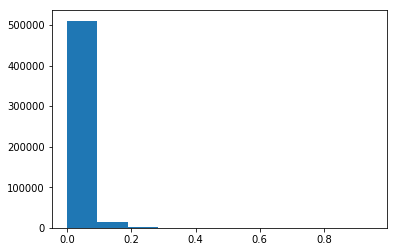

In [73]:
plt.hist(x_feat[y==0]['shared_2gram'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([5.04638e+05, 1.41630e+04, 1.77000e+03, 4.78000e+02, 1.95000e+02,
        1.11000e+02, 6.90000e+01, 2.60000e+01, 9.00000e+00, 5.00000e+00]),
 array([0.        , 0.09411765, 0.18823529, 0.28235294, 0.37647059,
        0.47058824, 0.56470588, 0.65882353, 0.75294118, 0.84705882,
        0.94117647]),
 <a list of 10 Patch objects>)

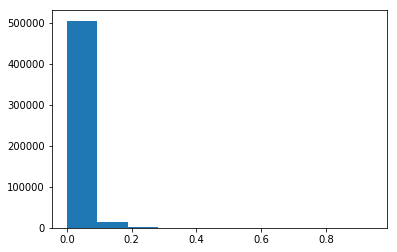

In [74]:
plt.hist(x_feat[y==1]['shared_2gram'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([5.22651e+05, 3.18000e+03, 5.78000e+02, 2.32000e+02, 1.23000e+02,
        6.90000e+01, 3.40000e+01, 2.90000e+01, 1.10000e+01, 5.00000e+00]),
 array([0.        , 0.04722222, 0.09444444, 0.14166667, 0.18888889,
        0.23611111, 0.28333333, 0.33055556, 0.37777778, 0.425     ,
        0.47222222]),
 <a list of 10 Patch objects>)

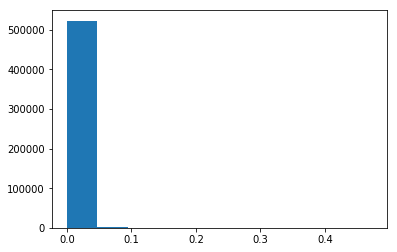

In [75]:
plt.hist(x_feat[y==0]['shared_3gram'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([5.16852e+05, 3.40000e+03, 6.80000e+02, 2.37000e+02, 1.37000e+02,
        7.60000e+01, 5.40000e+01, 1.70000e+01, 6.00000e+00, 5.00000e+00]),
 array([0.      , 0.046875, 0.09375 , 0.140625, 0.1875  , 0.234375,
        0.28125 , 0.328125, 0.375   , 0.421875, 0.46875 ]),
 <a list of 10 Patch objects>)

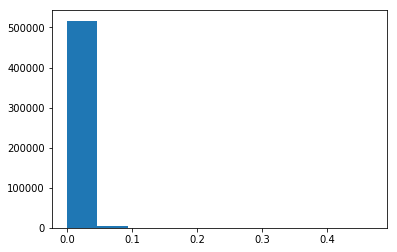

In [76]:
plt.hist(x_feat[y==1]['shared_3gram'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([7.9770e+03, 1.2391e+05, 2.5030e+05, 7.1509e+04, 5.5771e+04,
        1.3096e+04, 3.4710e+03, 7.3000e+02, 1.3200e+02, 1.6000e+01]),
 array([   5. ,  130.7,  256.4,  382.1,  507.8,  633.5,  759.2,  884.9,
        1010.6, 1136.3, 1262. ]),
 <a list of 10 Patch objects>)

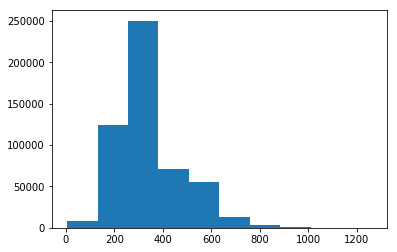

In [77]:
plt.hist(x_feat[y==0]['len_ans'])

/Users/s0c02nj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([8.76000e+03, 1.40543e+05, 2.34987e+05, 7.49430e+04, 4.85940e+04,
        1.03430e+04, 2.72200e+03, 5.02000e+02, 5.80000e+01, 1.20000e+01]),
 array([   4. ,  134.8,  265.6,  396.4,  527.2,  658. ,  788.8,  919.6,
        1050.4, 1181.2, 1312. ]),
 <a list of 10 Patch objects>)

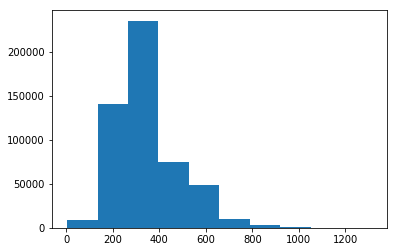

In [78]:
plt.hist(x_feat[y==1]['len_ans'])

In [79]:
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_leaves' : 100,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss'
}

In [81]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_feat, y, test_size=0.05, random_state=42)

In [82]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
d_valid = lgb.Dataset(x_test, y_test)

In [84]:
bst = lgb.train(params, d_train, 5000, valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[50]	valid_0's binary_logloss: 0.683424
[100]	valid_0's binary_logloss: 0.678984
[150]	valid_0's binary_logloss: 0.676915
[200]	valid_0's binary_logloss: 0.675777
[250]	valid_0's binary_logloss: 0.675161
[300]	valid_0's binary_logloss: 0.674802
[350]	valid_0's binary_logloss: 0.674537
[400]	valid_0's binary_logloss: 0.674394
[450]	valid_0's binary_logloss: 0.674269
[500]	valid_0's binary_logloss: 0.674191
[550]	valid_0's binary_logloss: 0.674099
[600]	valid_0's binary_logloss: 0.674039
[650]	valid_0's binary_logloss: 0.673999
[700]	valid_0's binary_logloss: 0.673958
[750]	valid_0's binary_logloss: 0.673946
[800]	valid_0's binary_logloss: 0.673916
[850]	valid_0's binary_logloss: 0.673902
[900]	valid_0's binary_logloss: 0.673892
[950]	valid_0's binary_logloss: 0.673886
[1000]	valid_0's binary_logloss: 0.673875
Early stopping, best iteration is:
[980]	valid_0's binary_logloss: 0.673867


In [76]:
#predictions=bst.predict(df_train[''])

In [71]:
# all_scores = {}
 
# for qid, pred in zip(df_test['id'], predictions):
   
#     if qid in all_scores:
#         all_scores[qid].append(pred[0])
#     else:
#         all_scores[qid] = [pred[0]]
 
       

In [85]:
predictions_total=bst.predict(x_feat)

In [94]:
import nltk

In [78]:
#len(predictions_total)

In [86]:
truths = {}
 
for qid, pred in zip(df_train['id'], df_train['is_ans']):   
    
    if qid in truths:
        truths[qid].append(pred)
    else:
        truths[qid] = [pred]

In [87]:
preds = {}
 
for qid, pred in zip(df_train['id'], predictions_total):
    if qid in preds:
        preds[qid].append(pred)
    else:
        preds[qid] = [pred]
 
scores = []
ranks = []
for q_id in truths:
   
    if q_id not in preds:
        scores.append(0)
    else:
        selected_psg = np.nonzero(truths[q_id])[0][0]
        sorted_preds = np.argsort(preds[q_id])[::-1]
        rank = np.where(sorted_preds==selected_psg)[0][0] + 1
        ranks.append(rank)
        scores.append(1.0 / rank)
       
score = np.mean(scores)
print(score)
 

0.8221344250536067


In [88]:
import time
t1=time.time()
num_partitions = 16
n_cores=7
dist_df_test = parallelize_dataframe(df_test, worker)
t2=time.time()

print t2-t1

13.5831508636


In [89]:
predictions=bst.predict(dist_df_test)

In [90]:
all_scores = {}
 
for qid, pred in zip(df_test['id'], predictions):
   
    if qid in all_scores:
        all_scores[qid].append(pred)
    else:
        all_scores[qid] = [pred]
 

In [92]:
submissionFileName = "answer3.tsv"
fw = open(submissionFileName, "w")
 
for query_id in all_scores:
    scores = all_scores[query_id]
    scores_str = [str(sc) for sc in scores] # convert all scores to string values
    scores_str = "\t".join(scores_str) # join all scores in list to make it one string with  tab delimiter. 
    fw.write(str(query_id)+"\t"+scores_str+"\n")
fw.close()

In [123]:
x_feat=dist_df
y=df_train['is_ans']

In [50]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_feat, y, test_size=0.05, random_state=42)

In [125]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0)
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
log_model.score(x_test,y_test)

0.900180851145009

In [130]:
#print (recall_score(y_test, log_model.predict(x_test)))
#print (precision_score(y_test, log_model.predict(x_test)))

In [131]:
y_pred=log_model.predict(x_test)

In [132]:
confusion_matrix(y_test, y_pred)

array([[235932,      5],
       [ 26157,      0]])

In [133]:
len(y_test)

262094

In [144]:
import xgboost as xgb
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

In [145]:
xgb_model = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 30,
 min_child_weight= 2,
 learning_rate=0.01,
 gamma=0.9,                        
 subsample=0.9,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

In [ ]:
xgb.XGBClassifier()
xgb_model.fit(np.array(x_train), np.array(y_train))

[23:22:50] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'


In [ ]:
xgb_model.score(x_test,y_test)

In [ ]:
y_pred=xgb_model.predict(x_test)

In [ ]:
print (recall_score(y_test, log_model.predict(x_test)))
print (precision_score(y_test, log_model.predict(x_test)))

In [ ]:
confusion_matrix(y_test, y_pred)